In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
char=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [4]:
def mylist(x):
    return x.map({'yes':1,'no':0})

df[char]=df[char].apply(mylist)

In [5]:
dummy=pd.get_dummies(df['furnishingstatus'],drop_first=True).astype(int)
dummy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [6]:
df=pd.concat([df,dummy],axis=1)

In [7]:
df=df.drop('furnishingstatus',axis=1)

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=20)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [13]:
df_train.shape, df_test.shape

((381, 14), (164, 14))

In [14]:
y_train = df_train.pop("price")
X_train = df_train

y_test = df_test.pop("price")
X_test = df_test

In [15]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=20, random_state=42)

In [16]:
import graphviz
from sklearn import tree

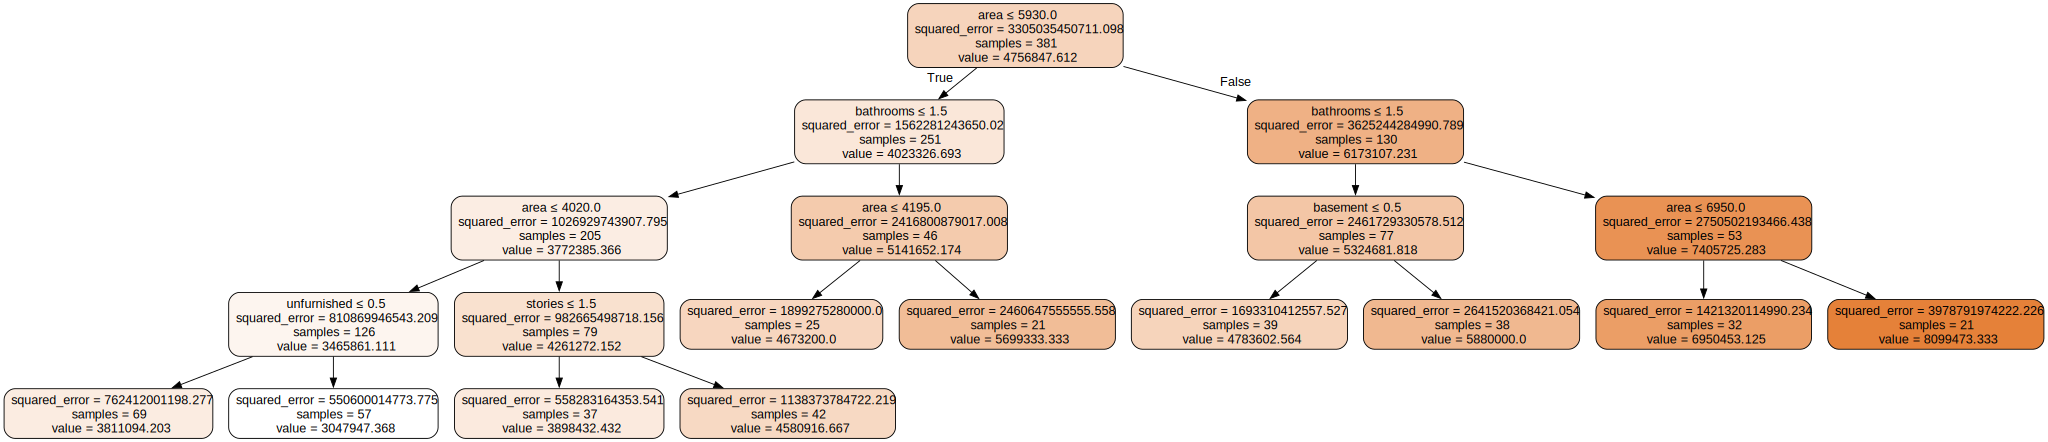

In [17]:
dot=tree.export_graphviz(dt,feature_names=X_train.columns,
                         class_names=y_train,filled=True,rounded=True,
                        special_characters=True)
g=graphviz.Source(dot)
g

In [18]:
y_train_pred = dt.predict(X_train)

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_train, y_train_pred)

0.5655495547920747

In [21]:
y_test_pred = dt.predict(X_test)

In [22]:
r2_score(y_test, y_test_pred)

0.5066637909807893

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=4, min_samples_leaf=20)

In [25]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=20, n_jobs=-1,
                      random_state=42)

In [26]:
sample_tree = rf.estimators_[20]

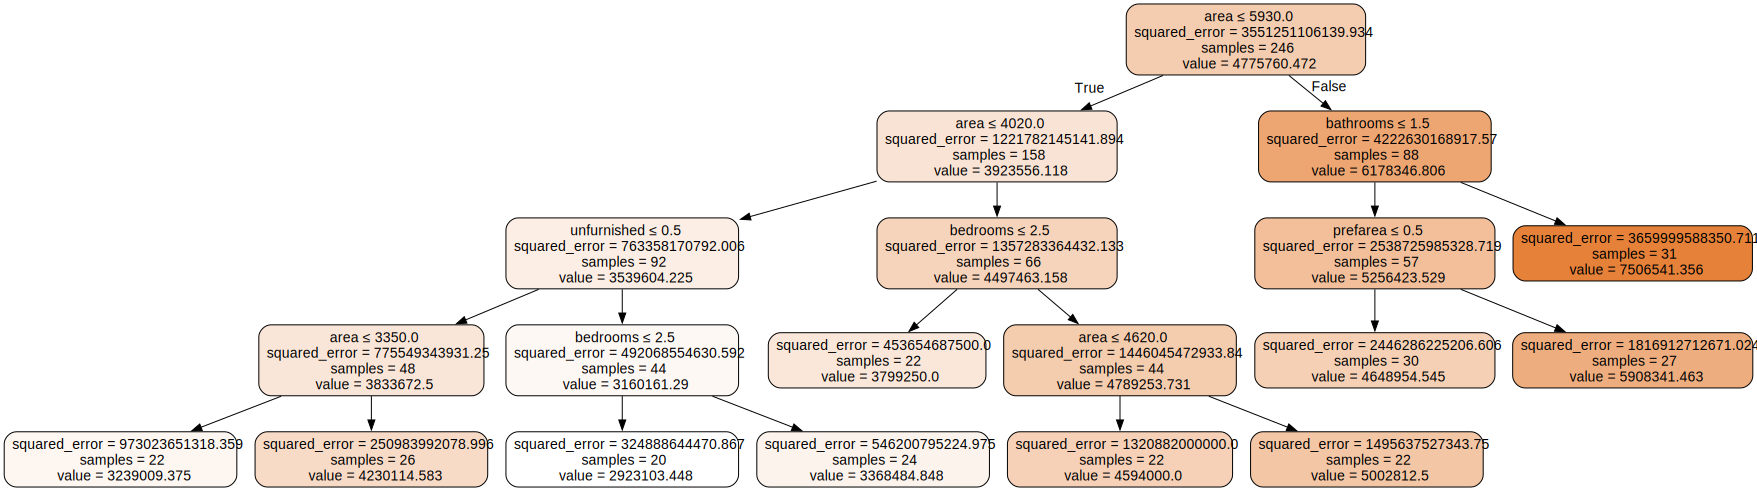

In [27]:
rff=tree.export_graphviz(sample_tree,feature_names=X_train.columns,
                         class_names=y_train,filled=True,rounded=True,
                        special_characters=True)
g=graphviz.Source(rff)
g

In [28]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [29]:
r2_score(y_train, y_train_pred)

0.5912256802835701

In [30]:
r2_score(y_test, y_test_pred)

0.5196990232691902

In [31]:
rf.feature_importances_

array([0.57329002, 0.00515546, 0.3058766 , 0.01281619, 0.00247212,
       0.00068901, 0.01866384, 0.        , 0.02069678, 0.00479916,
       0.01756914, 0.00220831, 0.03576335])

In [32]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

In [33]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,area,0.573290
2,bathrooms,0.305877
12,unfurnished,0.035763
8,airconditioning,0.020697
6,basement,0.018664
10,prefarea,0.017569
3,stories,0.012816
1,bedrooms,0.005155
9,parking,0.004799
4,mainroad,0.002472


## Ensembling

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [36]:
m1 = LinearRegression()
m2 = KNeighborsRegressor(5)
m3 = DecisionTreeRegressor(random_state=42, max_depth=4)

In [37]:
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [38]:
y_train_pred = (m1.predict(X_train) + m2.predict(X_train) + m3.predict(X_train))/3
y_test_pred = (m1.predict(X_test) + m2.predict(X_test) + m3.predict(X_test))/3

In [40]:
r2_score(y_train, y_train_pred)

0.7241651761489841

In [41]:
r2_score(y_test, y_test_pred)

0.6021276191080913